# Lab 03 - Extended Exercises
## Explaining and predicting student performance

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the linear regression model class
from pymer4.models import Lm

# Import the lmm model class
from pymer4.models import Lmer

# Import Gaussian modeling
import statsmodels.formula.api as smf

import scipy as sp
from scipy import stats

# Data directory
DATA_DIR = "./../../data/"

## Introduction
The data has already been cleaned and it comes from 29 students in 3 different groups in a course of 26 weeks.

In this lab you will explore different models to explain the quiz grade. 

In [29]:
# Load data
df= pd.read_csv(f'{DATA_DIR}grades_in_time.csv.gz')
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,39.9,3,6.1
1,0,1,32.4,3,7.0
2,0,2,17.5,3,6.9
3,0,3,16.0,3,7.0
4,0,4,15.9,3,7.2


In [30]:
df.describe(include='all')

,student,week,studying_hours,group,quiz_grade
count,810.000000,810.000000,810.000000,810.000000,810.000000
mean,14.500000,13.000000,10.050617,1.933333,6.931975
std,8.660789,7.793693,8.270041,0.772199,1.336888
min,0.000000,0.000000,1.000000,1.000000,1.200000
25%,7.000000,6.000000,5.700000,1.000000,6.400000
50%,14.500000,13.000000,7.800000,2.000000,7.200000
75%,22.000000,20.000000,11.100000,3.000000,7.800000
max,29.000000,26.000000,64.000000,3.000000,10.100000


# Task 1: Linear Model
----------
### 1.1 Preprocess the data to run a regression model to explain the effect of studying hours on quiz grade.  

In [31]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['studying_hours']
X = df[columns_to_scale]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
simple_X = pd.DataFrame(X, columns = columns_to_scale)
df_scaled = pd.concat([simple_X, df[['quiz_grade', 'week', 'student', 'group']]], axis=1)

In [33]:
df_scaled.head(2)

,studying_hours,quiz_grade,week,student,group
0,3.611569,6.1,0,0,3
1,2.704121,7.0,1,0,3


### 1.2 Explain your preprocessing steps

In [34]:
answer = """
Standardization helps correctly compare multiple variables (in different units) and 
reduce multicollinearity.
In this case, we only have one variable feature. Thus, it is not necessary but 
it is a good practice. 
"""

### 1.3 Run a regression model to explain the effect of studying hours on quiz grade.  

In [35]:
model1_str = """quiz_grade ~ 0 + studying_hours """ ## Write your model here
model = Lm(model1_str, data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

Formula: quiz_grade~0+studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.007	 R^2_adj: 0.006

Log-likelihood: -2729.422 	 AIC: 5460.844	 BIC: 5465.541

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val Sig
studying_hours     0.603   0.118    1.089  0.247  809   2.439  0.015   *


In [36]:
model1_str = """quiz_grade ~ 1 + studying_hours """ ## Write your model here
model = Lm(model1_str, data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

Formula: quiz_grade~1+studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.204	 R^2_adj: 0.203

Log-likelihood: -1291.688 	 AIC: 2587.376	 BIC: 2596.770

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE   DF   T-stat  P-val  Sig
Intercept          6.932   6.850    7.014  0.042  808  165.288    0.0  ***
studying_hours     0.603   0.521    0.686  0.042  808   14.384    0.0  ***


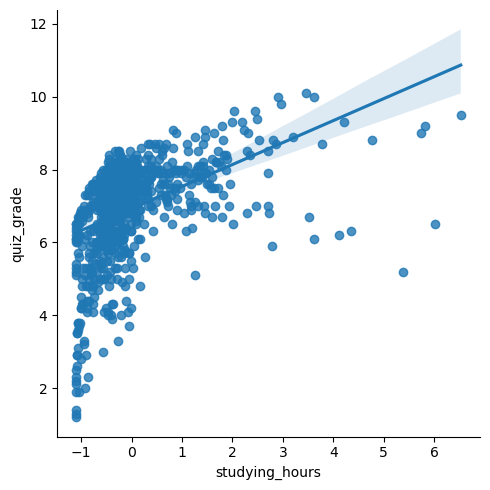

In [37]:
sns.lmplot(x="studying_hours", y="quiz_grade", data=df_scaled)

### 1.3 What model family (poisson, logistic, etc) did you use and why? 

In [38]:
answer = """
Gaussian is a good approximation becauset the dependent feature (y) is continuous (not discrete or binary).
"""

<Axes: xlabel='quiz_grade', ylabel='Count'>

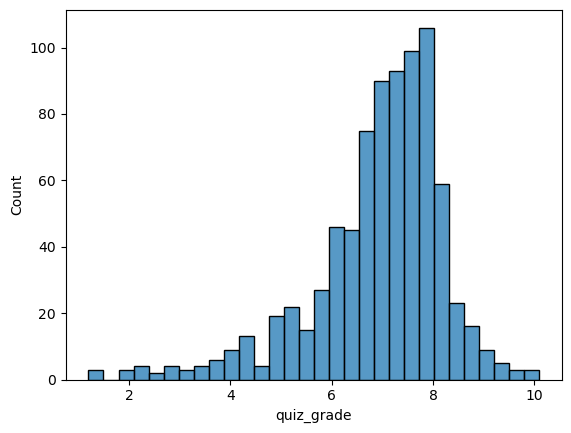

In [39]:
sns.histplot(df_scaled["quiz_grade"])

### 1.4 Interpret the regression results. 
Do the variables have a positive or negative effect? Is it significant?

In [40]:
answer = """
The number of studying hours has a positive and significant effect.
"""

### 1.5 Is this an appropriate method? Explain why or why not.

In [41]:
answer = """
No, because group differences are not taken into account.
"""

# Task 2: Linear Model with Fixed Effects
----------
### 2.1  Run a regression model to explain the effect of studying hours on quiz grade. Add fixed effects for group. 

In [42]:
df_scaled['group'] = df_scaled['group'].astype(str)

In [43]:
model = Lm("""quiz_grade ~ 1 + studying_hours  + group""", data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

Formula: quiz_grade~1+studying_hours+group

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.237	 R^2_adj: 0.234

Log-likelihood: -1274.546 	 AIC: 2557.091	 BIC: 2575.879

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val  Sig
Intercept          6.586   6.445    6.727  0.072  806  91.707    0.0  ***
group[T.2]         0.551   0.357    0.745  0.099  806   5.580    0.0  ***
group[T.3]         0.469   0.260    0.679  0.107  806   4.394    0.0  ***
studying_hours     0.647   0.564    0.730  0.042  806  15.294    0.0  ***


### 2.2 Interpret the regression results. 
What changed? What does it mean to have group fixed effects? 

In [44]:
answer = """
 Group fixed effects allow us to difference out any constant differences between groups,
 and focus only on changes within each entity over time.
"""

send(answer, 22) 

NameError: name 'send' is not defined

# Task 3: Linear Model with Random Effects
----------
### 3.1  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept for group. 

In [45]:
model = Lmer("""quiz_grade ~ 1 + (1|group) + studying_hours """, data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~1+(1|group)+studying_hours

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1282.909 	 AIC: 2573.817

Random effects:

                 Name    Var    Std
group     (Intercept)  0.084  0.289
Residual               1.369  1.170

No random effect correlations specified

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val  Sig
(Intercept)        6.927   6.589    7.264  0.172    2.004  40.249  0.001  ***
studying_hours     0.645   0.562    0.728  0.042  807.849  15.263  0.000  ***


### 3.2 Plot the regression lines
Hint: You may use model.plot

<Axes: xlabel='studying_hours', ylabel='quiz_grade'>

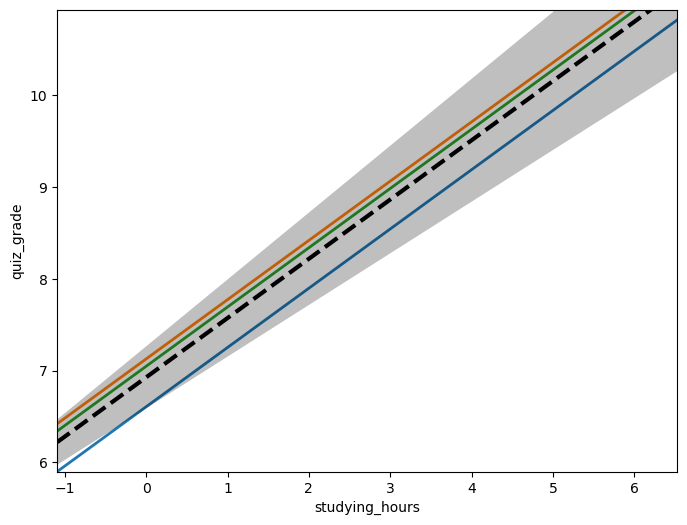

In [46]:
model.plot("studying_hours", plot_ci=True)

### 3.3  Run a regression model to explain the effect of studying hours on quiz grade. Add slope for group. 

In [47]:
model = Lmer("""quiz_grade ~ 1  + (0 + studying_hours|group) """, data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~1+(0+studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1230.242 	 AIC: 2466.484

Random effects:

                    Name    Var    Std
group     studying_hours  0.362  0.602
Residual                  1.198  1.094

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE       DF   T-stat  P-val  Sig
(Intercept)     6.853   6.766     6.94  0.044  739.487  154.658    0.0  ***


### 3.4 Plot the regression lines
Hint: You may use model.ranef

In [48]:
intercept = model.coefs.Estimate[0]

In [49]:
model.ranef.head()

,studying_hours
1,1.021431
2,-0.010058
3,0.059044


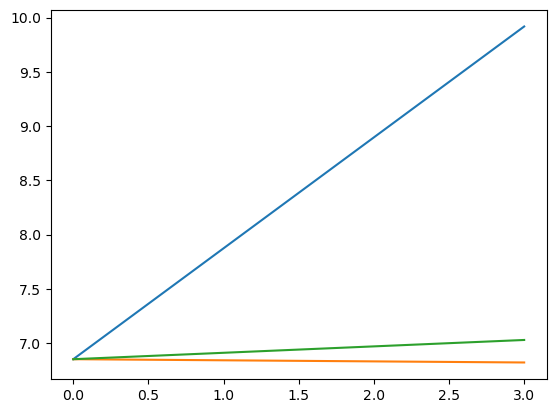

In [50]:
x = np.linspace(0, 3,4)
for i, row in model.ranef.iterrows():
    sns.lineplot(x=x, y=intercept + row['studying_hours']*x)

### 3.5  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for group. 

In [51]:
model = Lmer("""quiz_grade ~ (1 + studying_hours|group) """, data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1205.548 	 AIC: 2421.096

Random effects:

                    Name    Var    Std
group        (Intercept)  0.165  0.406
group     studying_hours  0.410  0.640
Residual                  1.124  1.060

               IV1             IV2  Corr
group  (Intercept)  studying_hours  -1.0

Fixed effects:

             Estimate  2.5_ci  97.5_ci    SE       DF   T-stat  P-val  Sig
(Intercept)      7.18   7.082    7.278  0.05  359.077  143.976    0.0  ***


In [52]:
model.ranef

,X.Intercept.,studying_hours
1,-0.679018,1.071420
2,-0.166013,0.261951
3,-0.018387,0.029013


### 3.6 Plot the regression lines

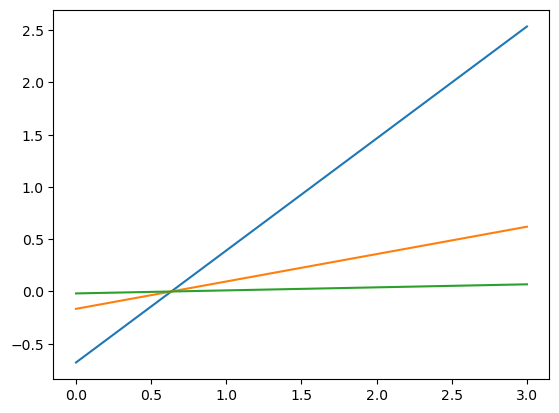

In [53]:
x = np.linspace(0, 3,4)
for i, row in model.ranef.iterrows():
    sns.lineplot(x=x, y=row['X.Intercept.'] + row['studying_hours']*x)

### 3.7 Interpret the regression results. 
What changed? What does it mean to have group random effects? 

In [54]:
answer = """
Effects are fixed if they are interesting in themselves
or random if there is interest in the underlying population.
With intercept random effects, we assumed that every group has a different starting 
point (y-intercept) and with slope random effects we assume that every group has a different rate.  
"""

send(answer, 37) 

NameError: name 'send' is not defined

# Task 4: Mixed Model with Time Interaction 
----------
### 4.1  Again, run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for groups AND interaction between the number of stuyding hours and time (weeks). 


In [55]:
model = Lmer("""quiz_grade ~  (1 + studying_hours*week|group) """, data=df_scaled, family='gaussian')

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours*week|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -845.316 	 AIC: 1714.632

Random effects:

                         Name    Var    Std
group             (Intercept)  1.529  1.237
group          studying_hours  1.510  1.229
group                    week  0.011  0.107
group     studying_hours:week  0.005  0.071
Residual                       0.447  0.668

                  IV1                  IV2   Corr
group     (Intercept)       studying_hours -0.732
group     (Intercept)                 week -0.976
group     (Intercept)  studying_hours:week -0.045
group  studying_hours                 week  0.604
group  studying_hours  studying_hours:week -0.578
group            week  studying_hours:week  0.252

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      DF   T-stat  P-val  

quiz_grade ~  (1 + studying_hours*week|group)

This will estimate: 

1. Global intercept
2. For each level of group: 
    1. Deviation from global Intercept
    2. Estimate of the effect of studying hours
    3. Estimate of the effect of time
    4. Estimate of the interaction between studying hours and time
    ----
    But also the the correlations between:
    1. Intercept and studying hours
    2. Intercept and time
    3. Intercept and interaction
    4. Studying hours and time
    5. Studying hours and interaction
    6. Time and interaction

__________
Another example:
V1 ~ (1+V3*V4|V2) + V3*V4

This will estimate:

1. Global intercept
2. Global estimate for effect of V3
3. Global estimate for effect of V4
4. Global estimate for the interaction between V3 and V4
5. For each level of V2: 
    1. Deviation from global Intercept
    2. Deviation from global estimate for effect of V3
    3. Deviation from global estimate for effect of V4
    4. Deviation from global estimate for the interaction between V3 and V4
    ----
    But also the the correlations between:
    1. Intercept and deviation of V3
    2. Intercept and deviation of V4
    3. Intercept and deviation of interaction
    4. deviation of V3 and deviation of V4
    5. deviation of V3 and deviation of interaction
    6. deviation of V4 and deviation of interaction

In [21]:
# get correlations of model
model.ranef_corr

,IV1,IV2,Corr
group,(Intercept),studying_hours,-0.732043
group,(Intercept),week,-0.976271
group,(Intercept),studying_hours:week,-0.044672
group,studying_hours,week,0.604313
group,studying_hours,studying_hours:week,-0.578097
group,week,studying_hours:week,0.252175


### 4.2 Interpret the regression results.  

In [39]:
answer = """
The variance of quiz grade by groups is estimated as 1.600 + 1.515 + 0.12 + 0.005 + 0.445 (from the residual) = 3.685
The studying hours by groups explain a big part of the variance (41%) but the interaction between studying hours and weeks
explains much less of the variance (0.1%).
We also observe a high correlation between random effects (intercept and slope) within each group. 
Studying hours is negatively correlated (-0.73) with the intercept as well as weeks (-0.97). 
The interaction term is weakly correlated with the intercept. 

When analyzing the coefficients (with model.ranef)
we observe that studying hours has a greater coefficient for group 1 (in comparison to the other groups)
and the week has a greater coefficient for group 3 (in comparison to the other groups). 
"""

send(answer, 42) 

<Response [200]>

In [40]:
model.ranef

,X.Intercept.,studying_hours,week,studying_hours.week
1,-1.352402,2.053030,0.091559,-0.072844
2,-1.427752,0.598642,0.108035,-0.000913
3,-1.175201,0.065531,0.129008,0.096540
